In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Loading dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

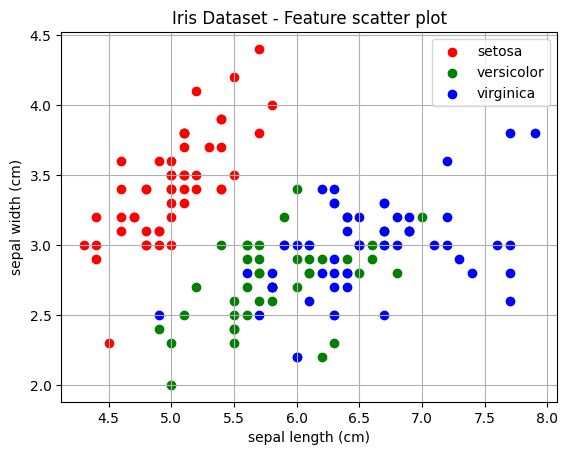

In [18]:
# basic plot of first two features
def plot_features(X, y, feature_names, target_names):
    colors = ['red', 'green', 'blue']
    for i in range(3):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    color=colors[i], label=target_names[i])
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Iris Dataset - Feature scatter plot")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_features(X, y, feature_names, target_names)

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [22]:
# predict
y_pred = model.predict(X_test)

In [23]:
# Evaluate
print("classification report: \n", classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

classification report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix: 
 [[14  0  0]
 [ 0 14  0]
 [ 0  0 10]]


C:\Users\devad\AppData\Local\Temp\ipykernel_5796\2209103099.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(target_names))
C:\Users\devad\AppData\Local\Temp\ipykernel_5796\2209103099.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(target_names))


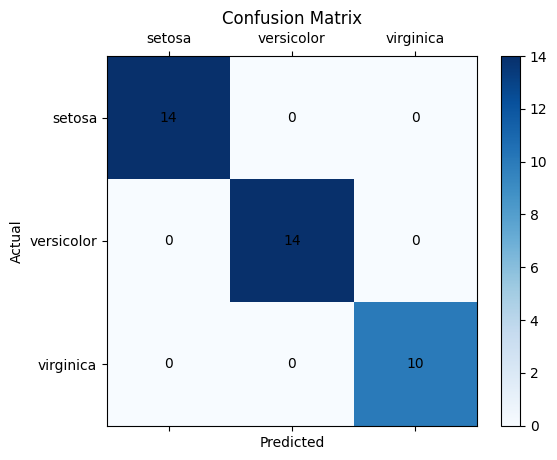

In [24]:
# plot confusion matrix
def plot_confusion_matrix(cm, target_names):
    fig, ax = plt.subplots()
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    fig.colorbar(cax)
    ax.set_xticklabels([''] + list(target_names))
    ax.set_yticklabels([''] + list(target_names))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    
    plt.show()

plot_confusion_matrix(cm=cm, target_names=target_names)